# Анализ данных о квалификациолнных сертификатах оценщиков на состоянию на 2024-12-01
Материал подготовлен ООО "Совконсалт" (https://t.me/AIinValuation)

Данный материал распространяется на условиях лицензии [Attribution-ShareAlike 4.0 International (CC BY-SA 4.0)](https://creativecommons.org/licenses/by-sa/4.0/). При его подготовке были использованы [открытые данные Росреестра](https://rosreestr.gov.ru/activity/vnesenie-svedeniy-v-gosudarstvennyy-reestr-samoreguliruemykh-organizatsiy-operatorov-elektronnykh-pl/vnesenie-svedeniy-v-reestry-samoreguliruemykh-organizatsiy/vnesenie-svedeniy-v-svodnyy-reestr-chlenov-samoreguliruemykh-organizatsiy-otsenshchikov/svedeniya-iz-svodnogo-reestra-chlenov-samoreguliruemykh-organizatsiy-otsenshchikov/), и он не содержит какие-либо персональные данные за исключением тех, которые находятся в свободном доступе.

## Подготовка данных

In [1]:
# Import Necessary Packages
import pandas as pd
import re
import matplotlib.pyplot as plt
import os


In [2]:
# Load the data file from the /data subfolder
file_path = 'data/certificates_2024-12-09.csv'  # Adjust the file name if necessary
df = pd.read_csv(file_path)

# Ensure 'date_issued' is in datetime format and contains only the date
df['date_issued'] = pd.to_datetime(df['date_issued'], errors='coerce').dt.date

# Add expiration date column
def calculate_expiration_date(issue_date):
    issue_date = pd.Timestamp(issue_date)  # Convert to Timestamp for consistent comparison
    if issue_date < pd.Timestamp("2017-10-31"):
        # Valid for 3 years + 10 months
        return issue_date + pd.DateOffset(years=3, months=10)
    elif pd.Timestamp("2017-11-01") <= issue_date <= pd.Timestamp("2018-01-31"):
        # Valid for 3 years + 7 months
        return issue_date + pd.DateOffset(years=3, months=7)
    elif pd.Timestamp("2018-02-01") <= issue_date <= pd.Timestamp("2018-05-31"):
        # Valid for 3 years + 4 months
        return issue_date + pd.DateOffset(years=3, months=4)
    else:
        # Valid for 3 years (default case)
        return issue_date + pd.DateOffset(years=3)

# Apply the function to the DataFrame
df['date_expire'] = df['date_issued'].apply(calculate_expiration_date)

# Ensure the column is in datetime format without time
df['date_expire'] = df['date_expire'].dt.date

# Replace all capital letters (Latin or Cyrillic) with their ordinal values in 'scope' column

def lowercase_cyrillic(text):
  """Replaces all capital Cyrillic letters in a string with lowercase."""

  # Regular expression to match capital Cyrillic letters (А-Я)
  pattern = r'[А-Я]'  

  # Use re.sub to replace matches with lowercase versions
  lowercase_text = re.sub(pattern, lambda x: x.group(0).lower(), text)
  return lowercase_text

df['scope'] = df['scope'].apply(lowercase_cyrillic)

## Анализ текущей ситуации

Analysis of Active Certificates as of 2024-12-01
                              Count   Share (%)
scope                                          
оценка недвижимости          8122.0   57.923263
оценка движимого имущества   3883.0   27.692198
оценка бизнеса               2017.0   14.384539
Total                       14022.0  100.000000
Analysis saved to output/active_certificates_analysis_2024-12-01.csv
Pie chart saved to output/active_certificates_distribution_2024-12-01.pdf


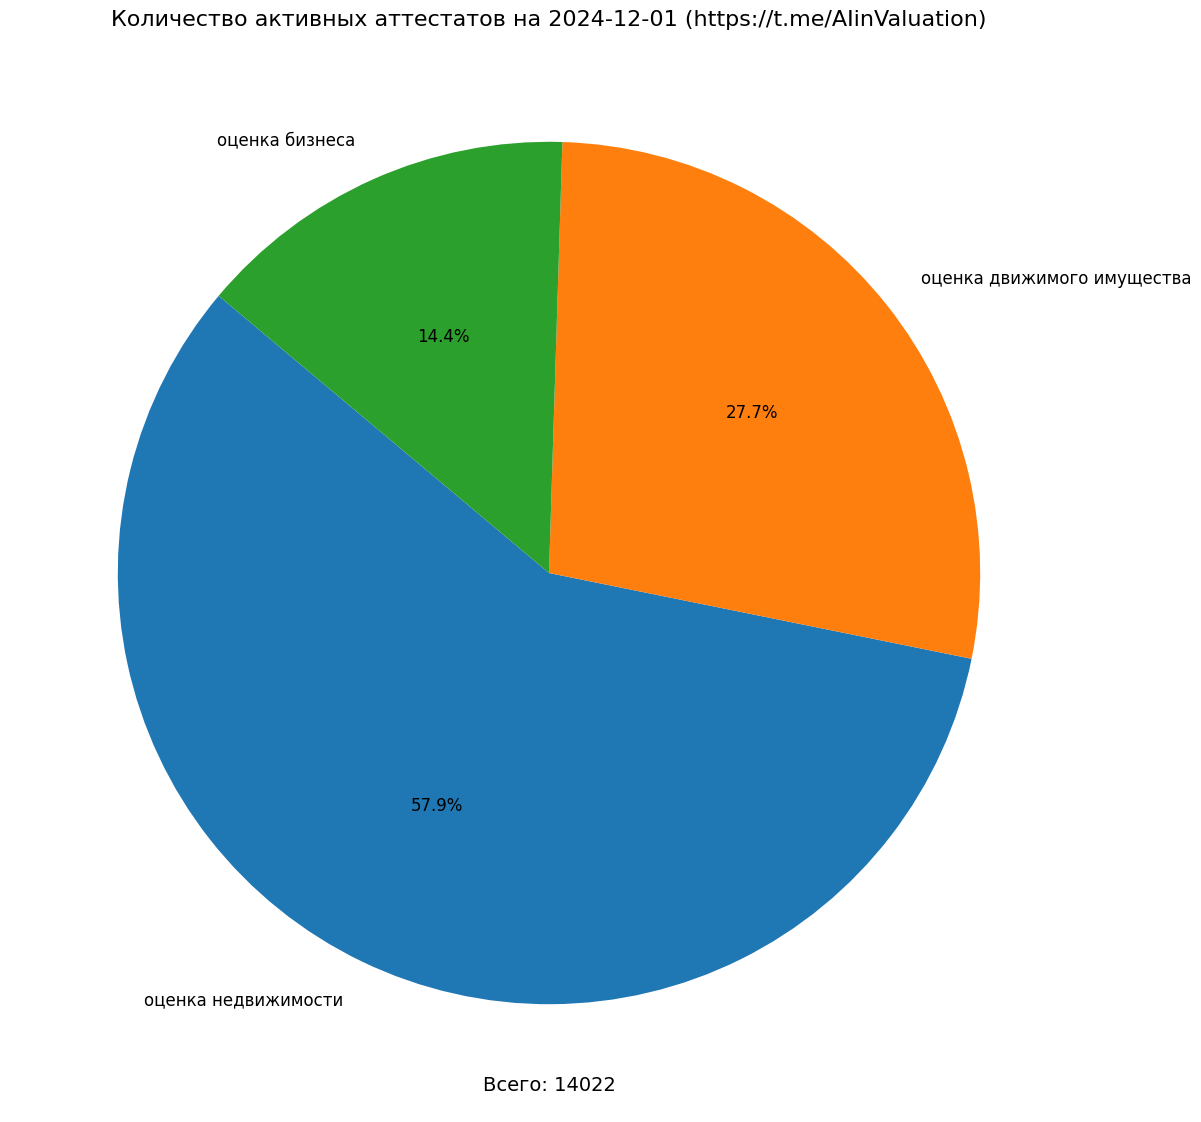

In [3]:
# Ensure the output folder exists
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

# Filter for active certificates as of 2024-12-01
reference_date = pd.Timestamp("2024-12-01")
active_certificates = df[df['date_expire'] > reference_date.date()]

# Calculate numbers and shares for each type of scope
scope_counts = active_certificates['scope'].value_counts()
total_active = scope_counts.sum()

# Calculate the share of each type
scope_shares = (scope_counts / total_active) * 100

# Combine into a single DataFrame for better presentation
analysis_result = pd.DataFrame({
    'Count': scope_counts,
    'Share (%)': scope_shares
})

# Add a row for the total
analysis_result.loc['Total'] = [total_active, 100.0]

# Display the result
print("Analysis of Active Certificates as of 2024-12-01")
print(analysis_result)

# Save the analysis result to a CSV file
output_csv_path = os.path.join(output_folder, 'active_certificates_analysis_2024-12-01.csv')
analysis_result.to_csv(output_csv_path, index=True)
print(f"Analysis saved to {output_csv_path}")

# Create a pie chart
plt.figure(figsize=(14, 14))
plt.pie(scope_counts, labels=scope_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title("Количество активных аттестатов на 2024-12-01 (https://t.me/AIinValuation)", fontsize=16)

# Add text with the total number of active certificates
total_text = f"Всего: {total_active}"
plt.text(0, -1.2, total_text, fontsize=14, ha='center')

# Save the pie chart
output_chart_path = os.path.join(output_folder, 'active_certificates_distribution_2024-12-01.pdf')
plt.savefig(output_chart_path)
print(f"Pie chart saved to {output_chart_path}")

# Show the plot
plt.show()

Analysis of Appraisers' Certificates as of 2024-12-01
                                           Category  Count   Share (%)
0                        только оценка недвижимости   4324   48.595190
1                 только оценка движимого имущества    480    5.394471
2                             только оценка бизнеса    318    3.573837
3  оценка недвижимости и оценка движимого имущества   2089   23.477186
4              оценка недвижимости и оценка бизнеса    393    4.416723
5       оценка движимого имущества и оценка бизнеса     48    0.539447
6                                 все три аттестата   1246   14.003147
7                                             всего   8898  100.000000
Results saved to output/appraisers_certificate_analysis_2024-12-01.csv
Pie chart saved to output/appraisers_certificate_distribution_2024-12-01.pdf


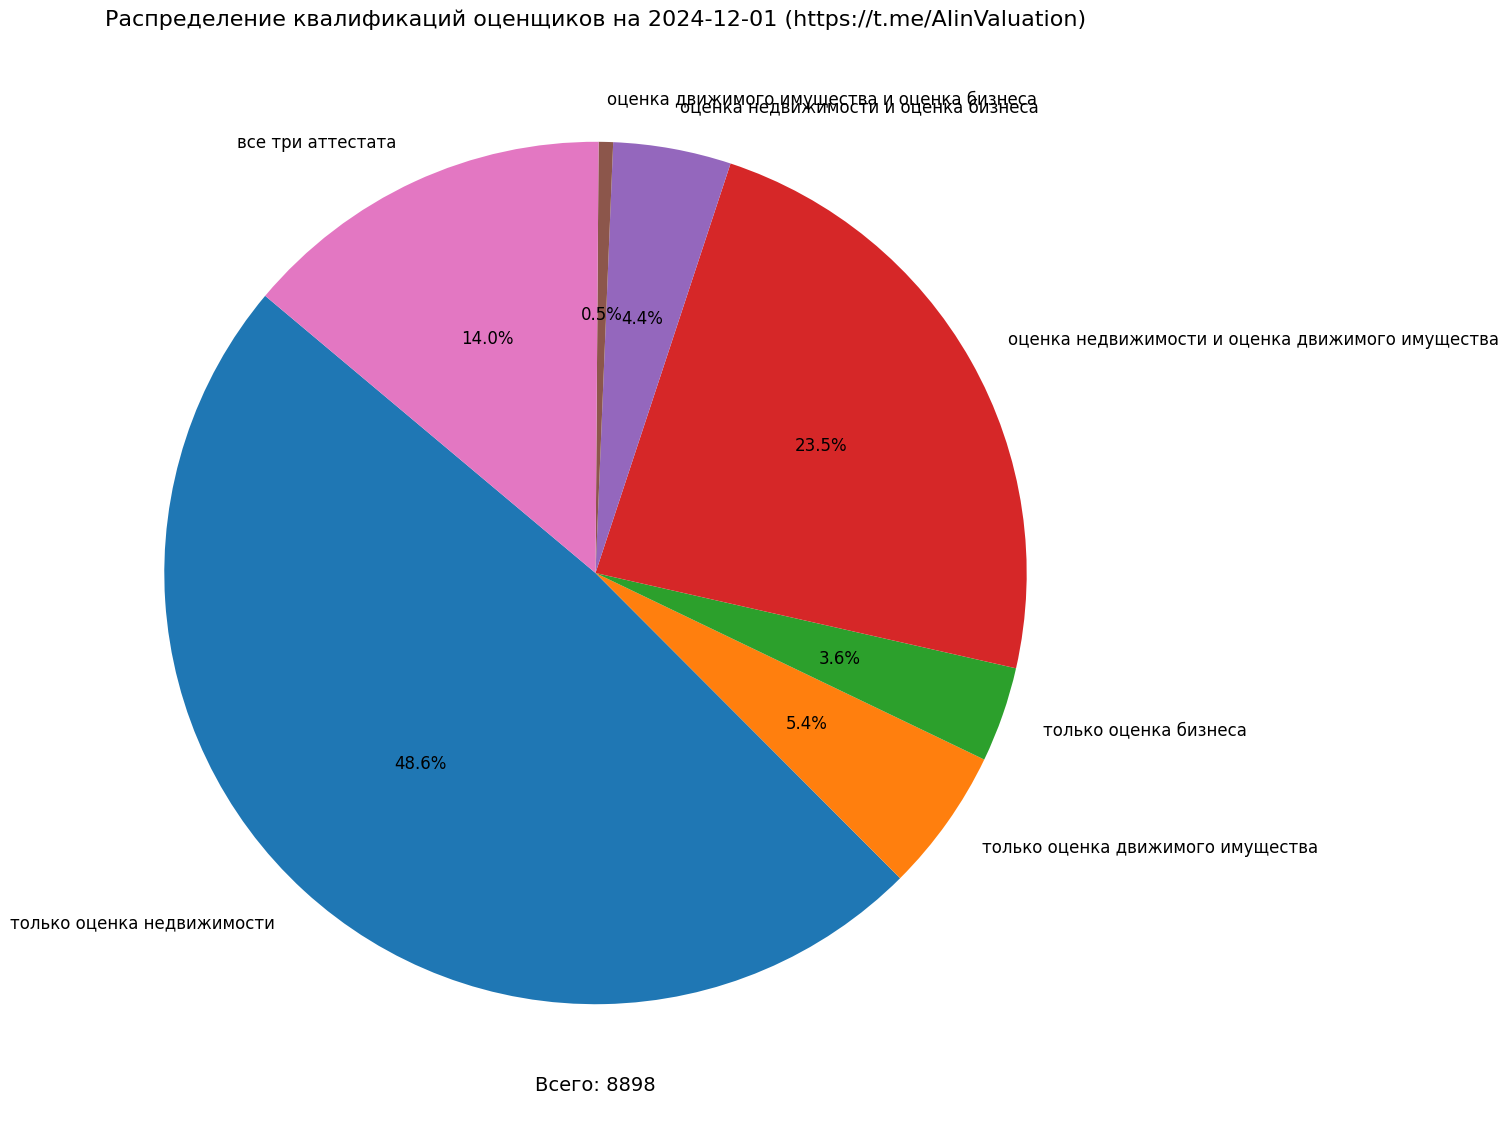

In [4]:
# Ensure the output folder exists
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

# Filter for active certificates as of 2024-12-01
reference_date = pd.Timestamp("2024-12-01")
active_certificates = df[df['date_expire'] > reference_date.date()]

# Group by unique appraisers (using last_name, first_name, middle_name)
grouped = active_certificates.groupby(['last_name', 'first_name', 'middle_name'])['scope'].apply(set)

# Define certificate categories
categories = {
    'оценка недвижимости': 1,
    'оценка движимого имущества': 2,
    'оценка бизнеса': 4
}

# Assign a unique bitmask to each combination
def categorize_certificates(certs):
    return sum(categories.get(cert, 0) for cert in certs)

appraiser_categories = grouped.apply(categorize_certificates)

# Calculate numbers for each category
results = {
    'только оценка недвижимости': (appraiser_categories == 1).sum(),
    'только оценка движимого имущества': (appraiser_categories == 2).sum(),
    'только оценка бизнеса': (appraiser_categories == 4).sum(),
    'оценка недвижимости и оценка движимого имущества': (appraiser_categories == 3).sum(),
    'оценка недвижимости и оценка бизнеса': (appraiser_categories == 5).sum(),
    'оценка движимого имущества и оценка бизнеса': (appraiser_categories == 6).sum(),
    'все три аттестата': (appraiser_categories == 7).sum()
}

# Convert results to a DataFrame for better presentation
results_df = pd.DataFrame(list(results.items()), columns=['Category', 'Count'])

# Calculate share for each category
total_appraisers = results_df['Count'].sum()
results_df['Share (%)'] = (results_df['Count'] / total_appraisers) * 100

# Add a row for the total
results_df.loc[len(results_df)] = ['всего', total_appraisers, 100.0]

# Save the results to a CSV file
output_csv_path = os.path.join(output_folder, 'appraisers_certificate_analysis_2024-12-01.csv')
results_df.to_csv(output_csv_path, index=False)

# Print the results
print("Analysis of Appraisers' Certificates as of 2024-12-01")
print(results_df)
print(f"Results saved to {output_csv_path}")

# Create a pie chart
plt.figure(figsize=(14, 14))
plt.pie(results_df['Count'][:-1], labels=results_df['Category'][:-1], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title("Распределение квалификаций оценщиков на 2024-12-01 (https://t.me/AIinValuation)", fontsize=16)

# Add text with the total number of appraisers
total_text = f"Всего: {total_appraisers}"
plt.text(0, -1.2, total_text, fontsize=14, ha='center')

# Save the pie chart
output_chart_path = os.path.join(output_folder, 'appraisers_certificate_distribution_2024-12-01.pdf')
plt.savefig(output_chart_path)
print(f"Pie chart saved to {output_chart_path}")

# Show the plot
plt.show()


## Исторический анализ

In [ ]:
# Ensure the output folder exists
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

# Generate a DataFrame with the range of dates from the first issue date to the reference date
first_issue_date = pd.Timestamp(df['date_issued'].min())
reference_date = pd.Timestamp("2024-12-01")
date_range = pd.date_range(start=first_issue_date, end=reference_date)

# Create a DataFrame to track the number of active certificates for each day
daily_active_certificates = pd.DataFrame({'date': date_range})

# Count active certificates by type
def count_active_certificates_by_type(date, scope):
    return ((pd.to_datetime(df['date_issued']) <= date) & 
            (pd.to_datetime(df['date_expire']) > date) & 
            (df['scope'] == scope)).sum()

# Calculate the total number of active certificates and by type
daily_active_certificates['active_count'] = daily_active_certificates['date'].apply(
    lambda date: ((pd.to_datetime(df['date_issued']) <= date) & (pd.to_datetime(df['date_expire']) > date)).sum()
)
daily_active_certificates['оценка недвижимости'] = daily_active_certificates['date'].apply(
    lambda date: count_active_certificates_by_type(date, 'оценка недвижимости')
)
daily_active_certificates['оценка движимого имущества'] = daily_active_certificates['date'].apply(
    lambda date: count_active_certificates_by_type(date, 'оценка движимого имущества')
)
daily_active_certificates['оценка бизнеса'] = daily_active_certificates['date'].apply(
    lambda date: count_active_certificates_by_type(date, 'оценка бизнеса')
)

# Save the results to a CSV file
output_csv_path = os.path.join(output_folder, 'daily_active_certificates_detailed_2024-12-01.csv')
daily_active_certificates.to_csv(output_csv_path, index=False)
print(f"Detailed daily active certificates data saved to {output_csv_path}")

# Plot the chart
plt.figure(figsize=(15, 9))
plt.plot(daily_active_certificates['date'], daily_active_certificates['active_count'], label='Общее количество аттестатов', linewidth=2)
plt.plot(daily_active_certificates['date'], daily_active_certificates['оценка недвижимости'], label='оценка недвижимости', linestyle='--')
plt.plot(daily_active_certificates['date'], daily_active_certificates['оценка движимого имущества'], label='оценка движимого имущества', linestyle='--')
plt.plot(daily_active_certificates['date'], daily_active_certificates['оценка бизнеса'], label='оценка бизнеса', linestyle='--')
plt.title('Количество активных аттестатов оценщиков по типу (https://t.me/AIinValuation)', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество активных аттестатов', fontsize=12)
plt.grid(True)
plt.legend()

# Save the chart
output_chart_path = os.path.join(output_folder, 'daily_active_certificates_detailed_2024-12-01.pdf')
plt.savefig(output_chart_path)
print(f"Chart saved to {output_chart_path}")

# Show the plot
plt.show()

Total active appraisers data saved to output/total_active_appraisers_2024-12-01.csv
Chart saved to output/total_active_appraisers_2024-12-01.pdf


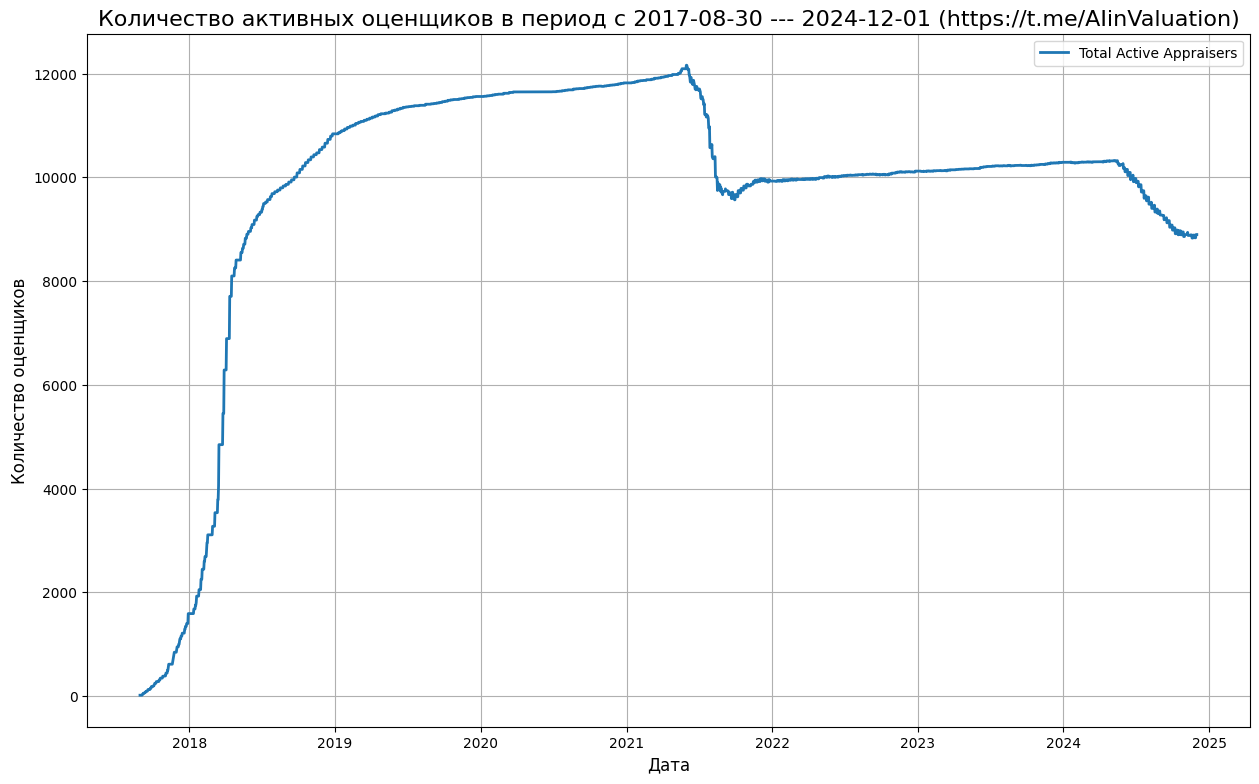

In [6]:
# Ensure the output folder exists
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

# Generate a DataFrame with the range of dates from the first issue date to the reference date
first_issue_date = pd.Timestamp(df['date_issued'].min())
reference_date = pd.Timestamp("2024-12-01")
date_range = pd.date_range(start=first_issue_date, end=reference_date)

# Create a DataFrame to track the number of appraisers with at least one active certificate for each day
daily_total_appraisers = pd.DataFrame({'date': date_range})

def count_total_appraisers(date):
    active_appraisers = df[(pd.to_datetime(df['date_issued']) <= date) &
                           (pd.to_datetime(df['date_expire']) > date)]
    grouped = active_appraisers.groupby(['last_name', 'first_name', 'middle_name']).size()
    return grouped.count()

# Calculate the total number of appraisers for each date
daily_total_appraisers['total_active_appraisers'] = daily_total_appraisers['date'].apply(count_total_appraisers)

# Save the results to a CSV file
output_csv_path = os.path.join(output_folder, 'total_active_appraisers_2024-12-01.csv')
daily_total_appraisers.to_csv(output_csv_path, index=False)
print(f"Total active appraisers data saved to {output_csv_path}")

# Plot the chart
plt.figure(figsize=(15, 9))
plt.plot(daily_total_appraisers['date'], daily_total_appraisers['total_active_appraisers'], label='Total Active Appraisers', linewidth=2)
plt.title('Количество активных оценщиков в период с 2017-08-30 --- 2024-12-01 (https://t.me/AIinValuation)', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество оценщиков', fontsize=12)
plt.grid(True)
plt.legend()

# Save the chart
output_chart_path = os.path.join(output_folder, 'total_active_appraisers_2024-12-01.pdf')
plt.savefig(output_chart_path)
print(f"Chart saved to {output_chart_path}")

# Show the plot
plt.show()

## Прогнозные значения

Histogram saved to output/expiration_dates_histogram_2024-12-01.pdf


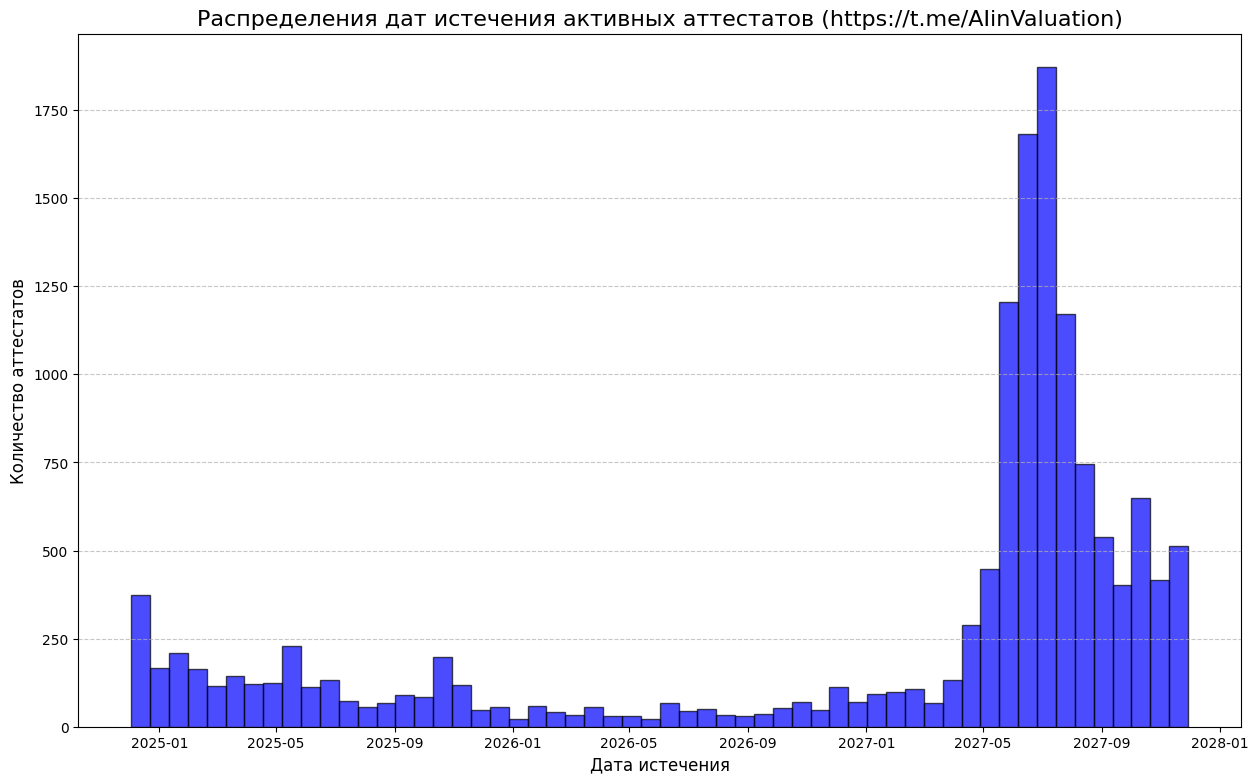

Expiration dates saved to output/expiration_dates_2024-12-01.csv


In [7]:
# Ensure the output folder exists
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

# Filter for certificates that are active as of now (2024-12-01)
reference_date = pd.Timestamp("2024-12-01")
active_certificates = df[(pd.to_datetime(df['date_issued']) <= reference_date) &
                         (pd.to_datetime(df['date_expire']) > reference_date)]

# Extract the expiration dates of active certificates
expiration_dates = pd.to_datetime(active_certificates['date_expire'])

# Plot the histogram of expiration dates
plt.figure(figsize=(15, 9))
plt.hist(expiration_dates, bins='auto', color='blue', edgecolor='black', alpha=0.7)
plt.title('Распределение дат истечения активных аттестатов (https://t.me/AIinValuation)', fontsize=16)
plt.xlabel('Дата истечения', fontsize=12)
plt.ylabel('Количество аттестатов', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the histogram
output_chart_path = os.path.join(output_folder, 'expiration_dates_histogram_2024-12-01.pdf')
plt.savefig(output_chart_path)
print(f"Histogram saved to {output_chart_path}")

# Show the plot
plt.show()

# Save the expiration dates to a CSV file (optional)
output_csv_path = os.path.join(output_folder, 'expiration_dates_2024-12-01.csv')
active_certificates[['last_name', 'first_name', 'middle_name', 'date_expire']].to_csv(output_csv_path, index=False)
print(f"Expiration dates saved to {output_csv_path}")